# 4주차 Ensemble 캐글 과제 - 16기 김주호

## 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

## 데이터 이해하기

### 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

## 칼럼 설명

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 / Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행 상품 이용 개월 수 / Period of relationship with bank
 - Total_Relationship_Count : 고객이 보유한 총 상품 수 / Total no. of products held by the customer
 - Months_Inactive_12_mon : 근 1년간 활동하지 않은 개월 수 / No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : 근 1년간 활동한 횟수 / No. of Contacts in the last 12 months
 - Credit_Limit : 신용카드 한도 / Credit Limit on the Credit Card
 - Total_Revolving_Bal : 신용카드의 총 리볼빙 / Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : 평균 잉여구매예산 / Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : 거래량 변화율 / Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : 총 거래량 / Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : 총 거래 횟수 / Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수의 변화율 / Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율 / Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 평가방식

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

## 대회 주소
https://www.kaggle.com/t/cd058141be084c4f81c9df010c587ae4

In [4]:
# 데이터의 경로 각자에 맞추어서 변경해주세요
data_dir = 'C:/Users/xnote/Desktop/투빅스/4주차/Week4_Ensemble_lsb/week4_Ensemble_Assignment/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')

In [5]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [6]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


## 데이터 전처리


In [7]:
train.shape

(8101, 20)

In [8]:
test.shape

(2026, 19)

In [9]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [10]:
test.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

데이터에 결측치는 존재하지 않는 것으로 보입니다.

하지만 진짜 결측치가 존재하지 않을까요?

결측치가 다른 이름으로 기록되어 있을 수도 있고 0으로 기록되어 있을 수도 있습니다.

이 부분은 한번 EDA를 통해서 확인해보세요!

# EDA

정형데이터의 경우 feature engineering 이 모델의 성능에 정말 큰 영향을 주기 때문에 EDA를 통해서 얻은 인사이트를 바탕으로 최고의 feature를 만들어보세요! 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           8101 non-null   object 
 4   Marital_Status            8101 non-null   object 
 5   Income_Category           8101 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Am

In [12]:
train.describe(include='all')

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,8101.000000,8101,8101.000000,8101,8101,8101,8101,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
unique,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4286,NaN,2535,3749,2848,7546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,46.291199,NaN,2.339958,NaN,NaN,NaN,NaN,35.905938,3.808172,2.347241,2.460931,8667.346587,1157.653746,7509.692840,0.760068,4444.729663,64.984199,0.711699,0.274665,0.160721
std,8.040300,NaN,1.300795,NaN,NaN,NaN,NaN,8.011260,1.553566,1.013624,1.098309,9127.897938,815.062550,9129.855775,0.218224,3448.702344,23.608677,0.235800,0.277166,0.367296
min,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,563.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2557.000000,289.000000,1316.000000,0.631000,2169.000000,45.000000,0.583000,0.020000,0.000000
50%,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1273.000000,3508.000000,0.737000,3904.000000,67.000000,0.700000,0.173000,0.000000
75%,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11135.000000,1781.000000,9930.000000,0.859000,4754.000000,81.000000,0.818000,0.504000,0.000000


In [13]:
import numpy as np
import pandas as pd

df=pd.DataFrame(train.dtypes=='object')

for obj in df[df[0]==True].index.tolist():
    print('**',obj,'범주의 수:',len(np.unique(train[obj])),'**','\n',np.unique(train[obj]),'\n')
    print(train[obj].value_counts(),'\n')
    print('#'*80)

** Gender 범주의 수: 2 ** 
 ['F' 'M'] 

F    4286
M    3815
Name: Gender, dtype: int64 

################################################################################
** Education_Level 범주의 수: 7 ** 
 ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown'] 

Graduate         2535
High School      1609
Unknown          1220
Uneducated       1158
College           807
Post-Graduate     409
Doctorate         363
Name: Education_Level, dtype: int64 

################################################################################
** Marital_Status 범주의 수: 4 ** 
 ['Divorced' 'Married' 'Single' 'Unknown'] 

Married     3749
Single      3155
Divorced     613
Unknown      584
Name: Marital_Status, dtype: int64 

################################################################################
** Income_Category 범주의 수: 6 ** 
 ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown'] 

Less than $40K    2848
$40K - $60K       1450
$80K - $120

In [14]:
for col in train.loc[:,train.dtypes!='object'].columns:
    print(train[col].value_counts())

44    400
45    399
49    388
47    386
48    381
46    380
43    366
50    363
42    339
51    321
41    303
52    302
53    295
40    290
39    271
54    255
38    239
55    217
37    214
56    197
36    183
57    179
35    154
59    132
58    132
34    115
60    102
33    101
32     83
62     79
65     78
61     74
31     72
26     64
30     56
63     52
29     49
64     33
27     26
28     24
66      2
68      2
70      1
73      1
67      1
Name: Customer_Age, dtype: int64
3    2206
2    2089
1    1491
4    1246
0     732
5     337
Name: Dependent_count, dtype: int64
36    1975
37     285
39     280
38     278
40     274
34     273
30     255
33     250
31     248
35     248
32     232
41     229
42     216
28     216
43     215
29     194
45     179
44     175
27     163
46     155
26     140
47     135
48     135
25     129
24     125
49     113
23      93
22      88
56      80
50      78
21      71
51      64
53      62
20      60
19      56
13      56
52      55
18      47
54 

수치형 변수와 문자형 변수 값의 종류를 보면 수치형 변수의 결측치는 없는 반면, **문자형 변수에는 결측치를 unknown이라는 값으로 채운 것**으로 보인다.  
따라서 이 값을 우선 np.nan값으로 수정한다.

In [15]:
# unknown을 np.nan으로 대체
train.replace('Unknown',np.nan,inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   object 
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           6881 non-null   object 
 4   Marital_Status            7517 non-null   object 
 5   Income_Category           7214 non-null   object 
 6   Card_Category             8101 non-null   object 
 7   Months_on_book            8101 non-null   int64  
 8   Total_Relationship_Count  8101 non-null   int64  
 9   Months_Inactive_12_mon    8101 non-null   int64  
 10  Contacts_Count_12_mon     8101 non-null   int64  
 11  Credit_Limit              8101 non-null   float64
 12  Total_Revolving_Bal       8101 non-null   int64  
 13  Avg_Open_To_Buy           8101 non-null   float64
 14  Total_Am

결측치는 Education_Level, Income_Category, Marital_Status, 총 3개의 변수 안에 있다.
- 1) 순위를 지정할 수 없다면 원핫인코딩으로 자동으로 결측치를 처리하고
- 2) 순위를 지정할 수 있다면 수치형변수로 변환하여 KNNImputer로 결측치를 채운다.

순위 지정 가능 변수: Education_Level, Income_Category  
순위 지정 불가능 변수: Marital_Status, Card_Category, Gender (Card_Category, Gender는 결측치는 없으나 수치형으로 결국 바꿔줘야함.)  

Gender는 0,1로 값을 바꿔주면 되지만 Marital_Status와 Card_Category의 경우, 원핫인코딩을 하게 될 경우, 범주의 수만큼 컬럼 수가 늘어나게 된다. 따라서, 두 변수의 이탈률을 시각화하여 집단화의 가능성을 파악하고 가능하다면 범주의 집단화를 통해 차원의 저주 문제를 최소화하는 것이 바람직해 보인다.

### 변수의 이탈률 시각화

Blue        16.141002
Silver      13.968958
Gold        18.888889
Platinum    28.571429
Name: Card_Category, dtype: float64
Blue        7546
Silver       451
Gold          90
Platinum      14
Name: Card_Category, dtype: int64


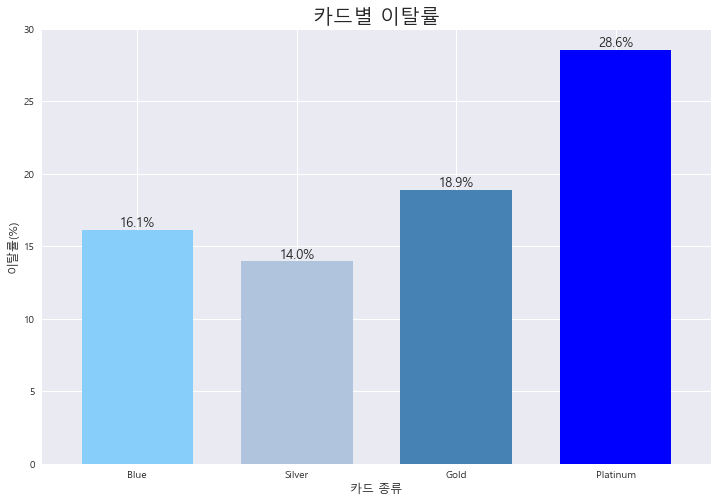

In [17]:
plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

df=train[train['Attrition_Flag']==1]['Card_Category'].value_counts()
total=train['Card_Category'].value_counts()

ratio=(df/total)*100
print(ratio)
print(total)

# 업무 부서별 퇴직률 시각화
ax=ratio.plot(kind='bar',width=0.7,color=['lightskyblue','lightsteelblue','steelblue','blue'],figsize=(12,8))
ax.set_title('카드별 이탈률',size=20)
ax.set_xticklabels(ratio.index,rotation=0)
ax.set_xlabel('카드 종류',fontsize=12)
ax.set_ylabel('이탈률(%)',size='large')

for i in range(4):
    plt.text(i, ratio[i], "%0.1f%%"%ratio[i], fontsize = 13, horizontalalignment='center', verticalalignment='bottom')

Blue, Silver / Gold, Platinum 이렇게 두 범주로 나누어 볼 수 있을 것 같으나 일단 원핫인코딩을 하고, 추후에 히트맵으로 변수간 상관관계를 확인한 후 집단화하도록 한다.

Married     15.070686
Single      16.988906
Divorced    16.639478
Name: Marital_Status, dtype: float64
Married     3749
Single      3155
Divorced     613
Name: Marital_Status, dtype: int64


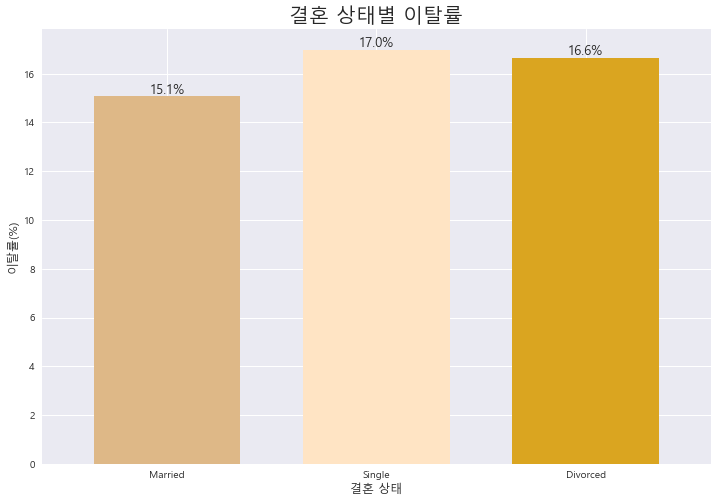

In [18]:
df=train[train['Attrition_Flag']==1]['Marital_Status'].value_counts()
total=train['Marital_Status'].value_counts()

ratio=(df/total)*100
print(ratio)
print(total)

# 업무 부서별 퇴직률 시각화
ax=ratio.plot(kind='bar',width=0.7,color=['burlywood','bisque','goldenrod'],figsize=(12,8))
ax.set_title('결혼 상태별 이탈률',size=20)
ax.set_xticklabels(ratio.index,rotation=0)
ax.set_xlabel('결혼 상태',fontsize=12)
ax.set_ylabel('이탈률(%)',size='large')

for i in range(3):
    plt.text(i, ratio[i], "%0.1f%%"%ratio[i], fontsize = 13, horizontalalignment='center', verticalalignment='bottom')

이혼한 사람의 카드 이탈률과 싱글인 사람의 이탈률이 큰 차이가 없으며 이혼상태 또한 싱글에 포함되된다. 따라서, 이혼상태를 싱글로 바꾸어주고 하나의 열로 married와 single을 각각 1,0으로 값을 부여하는 것이 합당해보인다. 이 또한 1차적인 데이터 전처리를 완료한 후에 집단화하도록 한다. 

In [19]:
# 0,1로 변환 가능한 Gender변수와 문자형 변수이지만 순위를 부여할 수 있는 Education_Level, Income_Category 열은 수치형변수로 변환
train.Gender=train.Gender.map({'F':0,'M':1})
train.Education_Level=train.Education_Level.map({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3,
                                                 'Post-Graduate':4, 'Doctorate':5})
train.Income_Category=train.Income_Category.map({'Less than $40K':0,'$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4})

In [20]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,0,1,NaN,Divorced,NaN,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,1,3,0.0,Single,2.0,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,1,0,0.0,Divorced,3.0,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,0,1,3.0,Single,1.0,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,0,0,0.0,Married,0.0,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [21]:
# Card_Category와 Marital_Status 열은 원핫인코딩을 진행 (+ 자동적으로 Marital_Status의 결측치 처리)
import pandas as pd
train=pd.get_dummies(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8101 non-null   int64  
 1   Gender                    8101 non-null   int64  
 2   Dependent_count           8101 non-null   int64  
 3   Education_Level           6881 non-null   float64
 4   Income_Category           7214 non-null   float64
 5   Months_on_book            8101 non-null   int64  
 6   Total_Relationship_Count  8101 non-null   int64  
 7   Months_Inactive_12_mon    8101 non-null   int64  
 8   Contacts_Count_12_mon     8101 non-null   int64  
 9   Credit_Limit              8101 non-null   float64
 10  Total_Revolving_Bal       8101 non-null   int64  
 11  Avg_Open_To_Buy           8101 non-null   float64
 12  Total_Amt_Chng_Q4_Q1      8101 non-null   float64
 13  Total_Trans_Amt           8101 non-null   int64  
 14  Total_Tr

* Education_Level, Income_Category 열에 있는 결측치는 **KNNImputer를 통해 결측치 처리**해주기
* 최적의 k값 찾기

In [26]:
from sklearn.impute import KNNImputer
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

def optimize_k(data, target):
    errors = []
    for k in range(1, 10, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=train.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LGBMClassifier()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        loss = log_loss(y_test, preds)
        errors.append({'K': k, 'logloss': loss})
        
    return errors

k=optimize_k(data=train,target='Attrition_Flag')
k

[{'K': 1, 'logloss': 0.8949047517259119},
 {'K': 3, 'logloss': 0.8522910853518271},
 {'K': 5, 'logloss': 0.8949047517259119},
 {'K': 7, 'logloss': 0.9375184180999965},
 {'K': 9, 'logloss': 0.8949042584517415}]

In [27]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)

# filled_train_but_heavy는 자료형태가 모두 float로 통일되기에 이전보다 메모리 사용량이 0.3MB 정도 커짐. 
# 따라서 해당 열만 추출해서 원래 데이터 프레임과 합칠 예정
filled_train_but_heavy=pd.DataFrame(imputer.fit_transform(train),columns=train.columns)
filled_cols=filled_train_but_heavy[['Education_Level','Income_Category']]

train.drop(['Education_Level','Income_Category'],axis=1,inplace=True)
train=pd.concat([filled_cols,train],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education_Level           8101 non-null   float64
 1   Income_Category           8101 non-null   float64
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   int64  
 4   Dependent_count           8101 non-null   int64  
 5   Months_on_book            8101 non-null   int64  
 6   Total_Relationship_Count  8101 non-null   int64  
 7   Months_Inactive_12_mon    8101 non-null   int64  
 8   Contacts_Count_12_mon     8101 non-null   int64  
 9   Credit_Limit              8101 non-null   float64
 10  Total_Revolving_Bal       8101 non-null   int64  
 11  Avg_Open_To_Buy           8101 non-null   float64
 12  Total_Amt_Chng_Q4_Q1      8101 non-null   float64
 13  Total_Trans_Amt           8101 non-null   int64  
 14  Total_Tr

* 이로써 결측치는 모두 처리함.
* **추후에 최종적으로 선택하게될 모델의 성능을 비교하며 knnimputer에서 최적의 k값을 찾을 예정**

<AxesSubplot:>

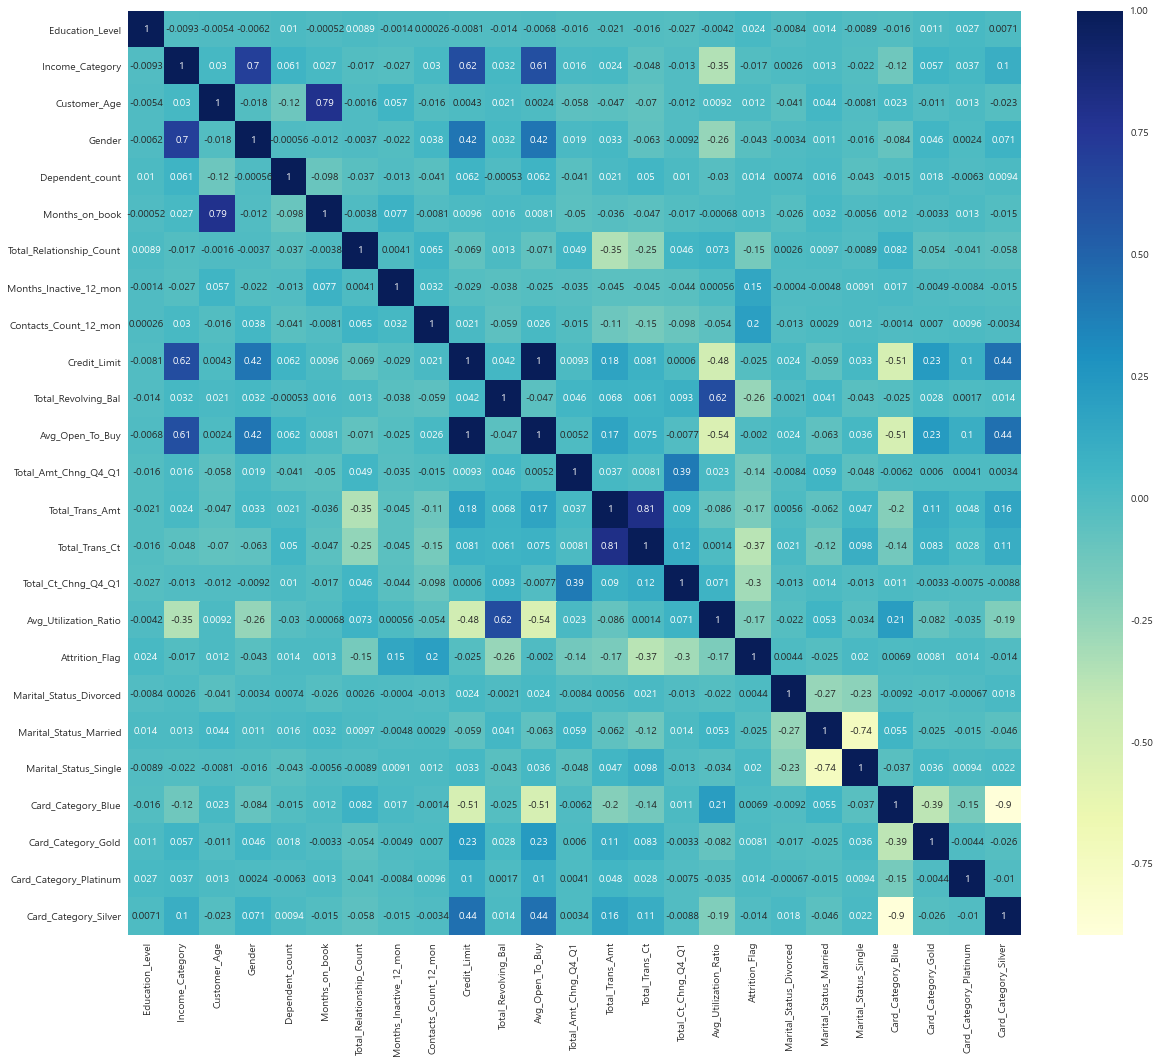

In [28]:
import seaborn as sns
plt.figure(figsize=(20,17))
sns.heatmap(train.corr(),cmap='YlGnBu',annot=True)

1. 위 상관관계 히트맵을 보면 타겟값인 Attrition_Flag와 상관관계가 있는 변수는 상관계수가 -0.37인 Total_Trans_Ct로, 총 거래 횟수가 적을수록 고객이탈이 커진다는 것을 확인할 수 있다.


2. Card_Category_Silver, Card_Category_Blue열이 -0.9로 음의 상관관계가 매우 높은데 원핫인코딩된 것을 고려하면 다른 카드 종류에 대해 두 열이 0인 값을 가지는 것을 제외하면 실버카드 이용자와 블루카드 이용자는 거의 완벽하게 분리된다고 볼 수 있다. 이후 다중공선성 문제를 고려하여 실버카드 열을 드랍하고 블루카드 열 이름을 Card_Category_SB로 바꾸는 것이 좋아보인다. 또한, 위 변수별 이탈률을 시각화한 것에서 두개의 범주로 나누고자 했으나 정보의 유실이 생길 것 같아 일단은 silver와 blue, gold, 그리고 platinum으로 세 개의 집단으로 나누도록 하자.


3. Marital_Status는 이혼상태에 따른 고객 이탈에 있어 특이점을 찾을 수 없으므로 기혼과 미혼으로만 원핫인코딩을 하도록 한다.


4. 근 1년간 활동한 횟수와 총 거래 횟수, 은행 상품을 이용한 총 개월 수, 세 개의 변수를 조합해서 **월평균 거래 횟수 대비 최근 1년간 월평균 활동한 횟수**라는 새로운 파생변수를 생성해보도록 한다

**2,3번 정리하면 Marital_Status_Single, Marital_Status_Divorced, Card_Category_Silver 세 개 열을 드랍하고 열 이름을 수정해준다.**

In [29]:
# Marital_Status_Single, Marital_Status_Divorced, Card_Category_Silver 세 개 열을 드랍하고 열 이름을 수정
train.drop(['Marital_Status_Single','Marital_Status_Divorced','Card_Category_Silver'],axis=1, inplace=True)
train.rename(columns={'Marital_Status_Married':'Maried_Status','Card_Category_Blue':'Card_Category_SB'},inplace=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education_Level           8101 non-null   float64
 1   Income_Category           8101 non-null   float64
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   int64  
 4   Dependent_count           8101 non-null   int64  
 5   Months_on_book            8101 non-null   int64  
 6   Total_Relationship_Count  8101 non-null   int64  
 7   Months_Inactive_12_mon    8101 non-null   int64  
 8   Contacts_Count_12_mon     8101 non-null   int64  
 9   Credit_Limit              8101 non-null   float64
 10  Total_Revolving_Bal       8101 non-null   int64  
 11  Avg_Open_To_Buy           8101 non-null   float64
 12  Total_Amt_Chng_Q4_Q1      8101 non-null   float64
 13  Total_Trans_Amt           8101 non-null   int64  
 14  Total_Tr

**4번: 파생변수 생성**  

Contacts_Count_12_mon, Total_Trans_Ct, Months_on_book으로 "평균 거래 횟수 대비 최근 1년간 활동한 횟수"라는 새로운 파생변수를 생성한다. 추후에 성능을 비교하며 필요하다면 파생변수 생성에 쓰인 열은 드랍하도록 한다.  

- Avg_Contacts_ratio(지정할 파생변수명) = Contacts_Count_12_mon / (Total_Trans_Ct/Months_on_book)

In [31]:
train['Avg_Contacts_ratio']=(train['Contacts_Count_12_mon']/12)/(train['Total_Trans_Ct']/train['Months_on_book'])

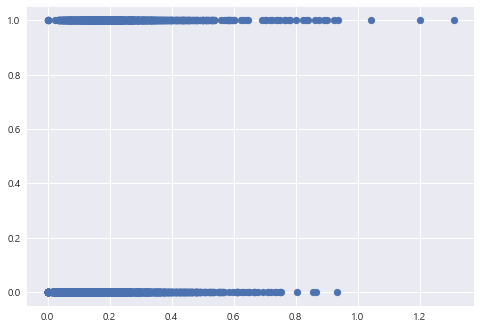

In [32]:
plt.scatter(train['Avg_Contacts_ratio'],train['Attrition_Flag'])

In [33]:
train[['Avg_Contacts_ratio','Attrition_Flag']].corr()

,Avg_Contacts_ratio,Attrition_Flag
Avg_Contacts_ratio,1.000000,0.340784
Attrition_Flag,0.340784,1.000000


**왜곡도 2이상인 피처 추출하여 왜곡도 개선을 위해 로그변환을 시행해준다.**

In [35]:
from scipy.stats import skew
features_index=train.dtypes[train.dtypes!='object'].index
skew_features=train[features_index].apply(lambda x:skew(x))

## skew 정도가 1 이상인 컬럼들만 추출
skew_features_top=skew_features[skew_features>2]
print(skew_features_top.sort_values(ascending=False))

Card_Category_Platinum    23.992594
Card_Category_Gold         9.328577
Avg_Contacts_ratio         2.281769
Total_Trans_Amt            2.006234
dtype: float64


원핫인코딩된 피처를 제외하면 Avg_Contacts_ratio, Total_Trans_Amt 열의 왜곡도가 2 이상으로 왜곡되어 있다.   
이 두 열만 로그변환과 boxcox변환을 비교하여 하나를 선택하도록한다.

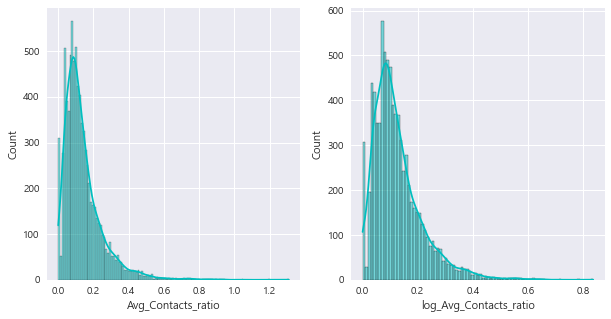

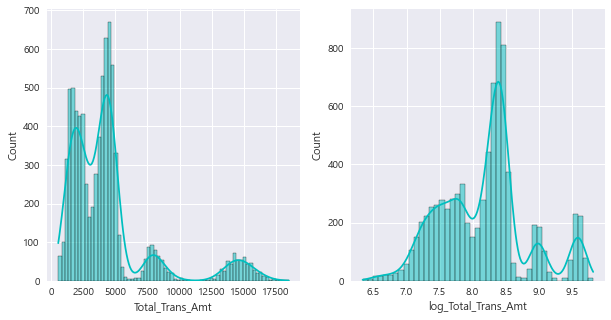

In [37]:
# 로그변환
train_1=train.copy()
# Total_Trans_Ct는 왜곡도가 1이상이 아니지만 두개 열을 LDA 차원축소를 할 것이기 때문에 로그변환 시도해주도록 한다.
col_list=['Avg_Contacts_ratio', 'Total_Trans_Amt']
for col in col_list:
    train_1['log_'+col]=np.log1p(train_1[col]) # 0을 가진 변수도 로그변환이 가능하도록 log1p()사용
    f,axes=plt.subplots(ncols=2,figsize=(10,5))
    sns.histplot(train[col],ax=axes[0],color='c',kde=True,)
    sns.histplot(train_1['log_'+col], ax=axes[1],color='c',kde=True)
    plt.show()

In [40]:
print('로그변환 후 왜곡도')
print(train_1['log_Avg_Contacts_ratio'].skew())
print(train_1['log_Total_Trans_Amt'].skew())

로그변환 후 왜곡도
1.6680371875991669
0.2702294518509034


로그변환 후 왜곡도가 개선되는 피처들이 몇몇 있음. boxcox변환을 통해 좀 더 왜곡도가 개선되는 피처가 있는지 확인해보자.

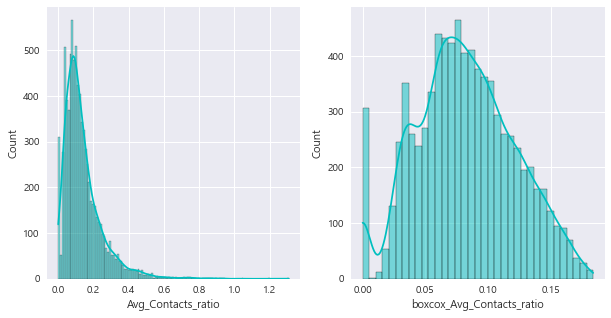

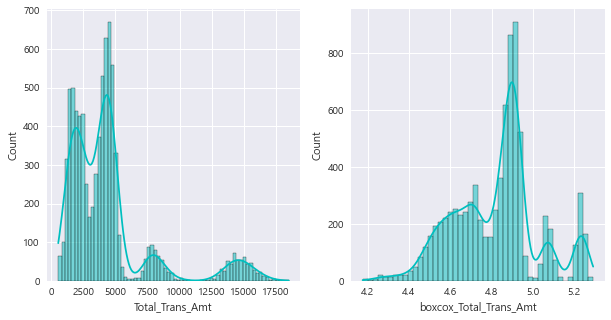

In [38]:
# boxcox 변환
from scipy import stats
train_2=train.copy()
col_list=['Avg_Contacts_ratio', 'Total_Trans_Amt']
for col in col_list:
    train_2[col]=train_2[col]+1
    train_2['boxcox_'+col]=stats.boxcox(train_2[col])[0] # 0을 가진 변수도 로그변환이 가능하도록 log1p()사용
    f,axes=plt.subplots(ncols=2,figsize=(10,5))
    sns.histplot(train[col],ax=axes[0],color='c',kde=True,)
    sns.histplot(train_2['boxcox_'+col], ax=axes[1],color='c',kde=True)
    plt.show()

In [41]:
print('로그변환 후 왜곡도')
print(train_2['boxcox_Avg_Contacts_ratio'].skew())
print(train_2['boxcox_Total_Trans_Amt'].skew())

로그변환 후 왜곡도
0.0999987951274392
0.0037606408723699957


=> boxcox변환해주는 것이 두개 열의 왜곡도를 더 크게 줄이는 것을 확인할 수 있다.

In [42]:
# 왜곡도 1 이상인 열에 대해 boxcox변환 시행
boxcox_trans_list=['Avg_Contacts_ratio', 'Total_Trans_Amt']

for col in boxcox_trans_list:
    if train[col].min()==0:
        train[col]=train[col]+1
    else: pass
    train[col]=stats.boxcox(train[col])[0]

In [43]:
train[['Avg_Contacts_ratio', 'Total_Trans_Amt']].describe()

,Avg_Contacts_ratio,Total_Trans_Amt
count,8101.000000,8101.000000
mean,0.081624,4.827428
std,0.038966,0.205498
min,0.000000,4.178512
25%,0.055431,4.678313
50%,0.079678,4.867920
75%,0.108236,4.928011
max,0.183370,5.299555


차원축소랑 파생변수 생성 없이 모델 돌려보기!!

# Model

저는 라벨인코딩만을 이용한 간단한 베이스 라인 모델을 만들었습니다.

16기 분들은 feature engineering, 하이퍼 파라미터 튜닝, 앙상블 등 다양한 방법으로 성능이 우수한 모델을 만들어보세요!

In [62]:
train

,Education_Level,Income_Category,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Maried_Status,Card_Category_SB,Card_Category_Gold,Card_Category_Platinum,Avg_Contacts_ratio
0,2.666667,3.000000,44,0,1,36,3,2,1,17116.0,...,4.845465,50,0.923,0.075,0,0,1,0,0,0.050001
1,0.000000,2.000000,42,1,3,30,4,2,3,8302.0,...,4.807611,66,0.610,0.156,0,0,1,0,0,0.081650
2,0.000000,3.000000,57,1,0,39,4,4,3,2795.0,...,4.923222,67,0.861,0.655,0,0,1,0,0,0.096304
3,3.000000,1.000000,26,0,1,20,6,3,3,1438.3,...,4.678003,48,0.412,0.468,0,0,1,0,0,0.076759
4,0.000000,0.000000,38,0,0,26,5,1,4,2230.0,...,4.856758,63,0.909,0.000,0,1,1,0,0,0.092891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,3.000000,0.000000,46,0,3,36,3,2,2,2391.0,...,5.066356,101,0.603,0.680,0,0,1,0,0,0.049591
8097,0.000000,1.000000,37,1,3,25,5,0,3,1438.3,...,4.945867,77,0.925,0.000,0,1,1,0,0,0.063698
8098,3.000000,0.000000,50,0,1,36,4,2,3,1438.3,...,4.928707,71,1.088,0.000,0,1,1,0,0,0.088004
8099,1.000000,0.000000,55,0,2,45,5,2,0,3187.0,...,4.579635,38,0.652,0.790,0,1,1,0,0,0.000000


In [63]:
X_features=train.drop('Attrition_Flag',axis=1)
y_target=train['Attrition_Flag']

In [64]:
# 훈련용, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state = 2021, stratify = y_target)

In [65]:
y_train.value_counts() / y_train.value_counts().sum()

0    0.839352
1    0.160648
Name: Attrition_Flag, dtype: float64

In [66]:
X_train.shape

(6480, 22)

## Voting

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(random_state = 16)
dt_clf = DecisionTreeClassifier(random_state = 16, max_depth = None)
svm_clf = SVC(probability = True, random_state = 16) # 클래스의 예측 확률을 구하기 위해서

voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('dt', dt_clf), ('svm', svm_clf)], voting = 'soft')

In [50]:
def eval_index(clf,X_train,y_train,y_test):
    from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    pred_proba=clf.predict_proba(X_test)
    
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    log_loss=log_loss(y_test,pred_proba)
    
    print('오차행렬')
    print(confusion,'\n')
    print(f'손실함수 값(logloss): {log_loss:.4f}, 정확도: {accuracy:.4f}')

In [51]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [52]:
for clf in [log_clf,dt_clf,svm_clf,voting_clf]:
    eval_index(clf, X_train, y_train, y_test)
    print('\n')

오차행렬
[[1301   59]
 [ 134  127]] 

손실함수 값(logloss): 0.3048, 정확도: 0.8809


오차행렬
[[1294   66]
 [  43  218]] 

손실함수 값(logloss): 2.3225, 정확도: 0.9328


오차행렬
[[1360    0]
 [ 261    0]] 

손실함수 값(logloss): 0.3363, 정확도: 0.8390


오차행렬
[[1327   33]
 [  99  162]] 

손실함수 값(logloss): 0.2147, 정확도: 0.9186




In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 16, n_estimators = 500, n_jobs = -1)

In [54]:
eval_index(rf_clf, X_train, y_train, y_test)

오차행렬
[[1331   29]
 [  44  217]] 

손실함수 값(logloss): 0.1382, 정확도: 0.9550


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt_clf2 = DecisionTreeClassifier(random_state = 16, max_depth = None)

bag_clf = BaggingClassifier(dt_clf2,
                            n_estimators = 500,
                            bootstrap = True, n_jobs = -1) # Bagging

pas_clf = BaggingClassifier(dt_clf2,
                            n_estimators = 500,
                            bootstrap = False, n_jobs = -1) # Pasting

In [56]:
eval_index(bag_clf, X_train, y_train, y_test)

오차행렬
[[1323   37]
 [  35  226]] 

손실함수 값(logloss): 0.1367, 정확도: 0.9556


In [69]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgb_clf = XGBClassifier(random_state = 16,
                        n_estimators = 500)

lgbm_clf = LGBMClassifier(random_state = 16,
                          n_estimators = 500)

In [70]:
eval_index(xgb_clf, X_train, y_train, y_test)

[04:08:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬
[[1335   25]
 [  28  233]] 

손실함수 값(logloss): 0.1086, 정확도: 0.9673


In [71]:
eval_index(lgbm_clf, X_train, y_train, y_test)

오차행렬
[[1341   19]
 [  27  234]] 

손실함수 값(logloss): 0.1285, 정확도: 0.9716


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

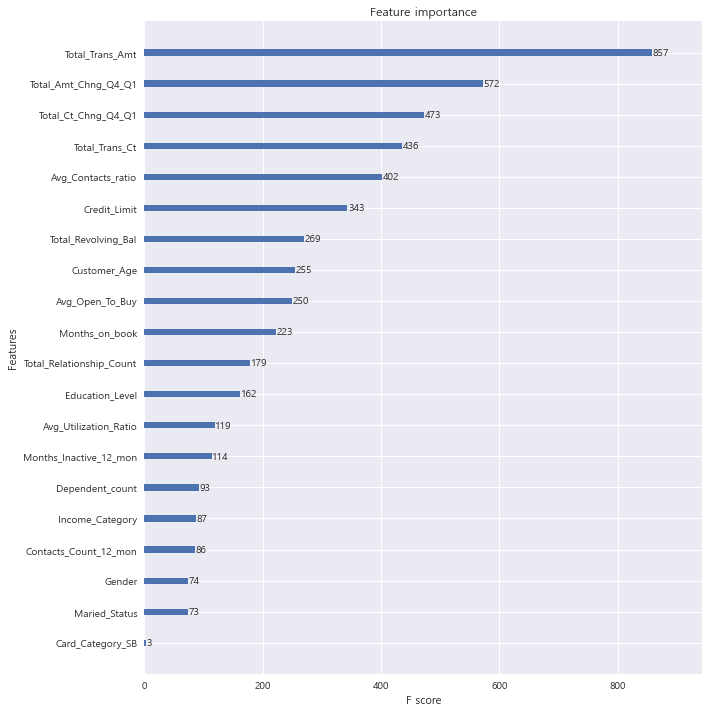

In [72]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_clf,ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

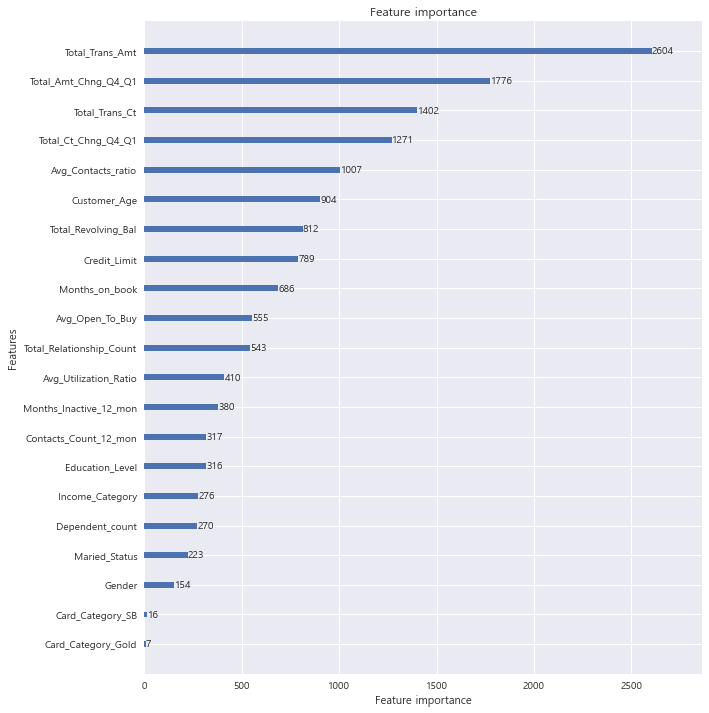

In [73]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf,ax=ax)

## 이상치 제거

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

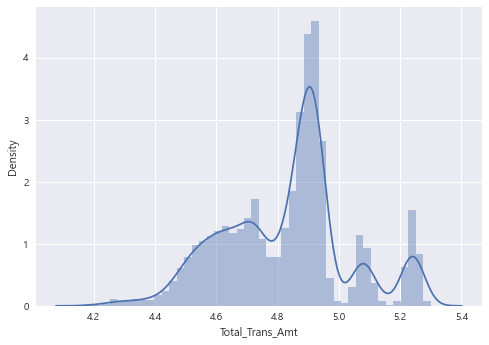

In [242]:
sns.distplot(train['Total_Trans_Amt'])

**타겟값과 Total_Trans_Amt는 음의 상관관계이므로 Amount가 lowest(=quan_25-iqr_weight)보다 작을 때, 타겟값이 0인 것은 이상치라고 판단가능하다. Amount가 highest(=quan_25+iqr_weight)보다 클 때는 타겟값이 1인 것이 이상치라고 볼 수 있다.**


In [74]:
import numpy as np
def get_outlier_0(df,column,weight=1.5):
    attrition=df[df['Attrition_Flag']==0][column]
    quan_25=np.percentile(attrition.values,25)
    quan_75=np.percentile(attrition.values,75)
    iqr=quan_75-quan_25
    iqr_weight=iqr*weight
    lowest=quan_25-iqr_weight
    highest=quan_25+iqr_weight
    outlier_index=attrition[(attrition<lowest)].index
    return outlier_index

In [75]:
def get_outlier_1(df,column,weight=1.5):
    attrition=df[df['Attrition_Flag']==1][column]
    quan_25=np.percentile(attrition.values,25)
    quan_75=np.percentile(attrition.values,75)
    iqr=quan_75-quan_25
    iqr_weight=iqr*weight
    lowest=quan_25-iqr_weight
    highest=quan_25+iqr_weight
    outlier_index=attrition[(attrition>highest)].index
    return outlier_index

In [76]:
outlier_index0_Amt=get_outlier_0(df=train,column='Total_Trans_Amt')
print(outlier_index0_Amt)

Int64Index([1005, 2372, 2477, 3243, 4816, 7295], dtype='int64')


In [77]:
outlier_index1_Amt=get_outlier_1(df=train,column='Total_Trans_Amt')
print(outlier_index1_Amt)

Int64Index([   6,   13,   27,   36,   89,  118,  214,  231,  241,  274,
            ...
            7957, 7965, 7973, 7981, 7994, 8001, 8037, 8044, 8074, 8082],
           dtype='int64', length=253)


253개는 너무 많기에 이상치라고 보기 힘들다. 따라서 이 부분을 행 데이터에서 제거하는 것은 생략한다.

In [78]:
train.shape

(8101, 23)

In [79]:
# 이상치 행 제거!
train2=train.copy()

train2.drop(outlier_index0_Amt,axis=0,inplace=True)

In [80]:
train2.shape

(8095, 23)

In [81]:
X_features=train2.drop('Attrition_Flag',axis=1)
y_target=train2['Attrition_Flag']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state = 2021, stratify = y_target)

In [82]:
eval_index(xgb_clf, X_train, y_train, y_test)

[04:09:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬
[[1346   13]
 [  26  234]] 

손실함수 값(logloss): 0.0789, 정확도: 0.9759


In [83]:
eval_index(lgbm_clf, X_train, y_train, y_test)

오차행렬
[[1345   14]
 [  26  234]] 

손실함수 값(logloss): 0.1127, 정확도: 0.9753


In [84]:
eval_index(rf_clf, X_train, y_train, y_test)

오차행렬
[[1338   21]
 [  46  214]] 

손실함수 값(logloss): 0.1254, 정확도: 0.9586


### train 데이터셋 전처리 전체 (RobustScaling 과정 추가)

In [89]:
data_dir = 'C:/Users/xnote/Desktop/투빅스/4주차/Week4_Ensemble_lsb/week4_Ensemble_Assignment/'
train = pd.read_csv(data_dir + 'train.csv')

train.replace('Unknown',np.nan,inplace=True)
train.Gender=train.Gender.map({'F':0,'M':1})
train.Education_Level=train.Education_Level.map({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3,
                                                 'Post-Graduate':4, 'Doctorate':5})
train.Income_Category=train.Income_Category.map({'Less than $40K':0,'$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4})
train=pd.get_dummies(train)

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
filled_train_but_heavy=pd.DataFrame(imputer.fit_transform(train),columns=train.columns)
filled_cols=filled_train_but_heavy[['Education_Level','Income_Category']]

train.drop(['Education_Level','Income_Category'],axis=1,inplace=True)
train=pd.concat([filled_cols,train],axis=1)

train.drop(['Marital_Status_Single','Marital_Status_Divorced','Card_Category_Silver'],axis=1, inplace=True)
train.rename(columns={'Marital_Status_Married':'Marital_Status','Card_Category_Blue':'Card_Category_SB'},inplace=True)

train['Avg_Contacts_ratio']=(train['Contacts_Count_12_mon']/12)/(train['Total_Trans_Ct']/train['Months_on_book'])

boxcox_trans_list=['Total_Trans_Amt','Avg_Contacts_ratio']
for col in boxcox_trans_list:
    if train[col].min()==0:
        train[col]=train[col]+1
    else: pass
    train[col]=stats.boxcox(train[col])[0]

train2=train.copy()
train2.drop(outlier_index0_Amt,axis=0,inplace=True)

X_features=train2.drop('Attrition_Flag',axis=1)
y_target=train2['Attrition_Flag']

# RobustScaler()로 스케일링했을 때 가장 테스트 성능이 좋았음
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
X_features=robustScaler.fit_transform(X_features)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state = 2021, stratify = y_target)

### XGBoost 베이지안 최적화

In [109]:
bayes_params={'learning_rate':(0.05,0.1), 'colsample_bytree':(0.5,1), 'subsample':(0.5,1), 'max_depth':(5,50), 
              'reg_alpha':(0,0.5), 'reg_lambda':(0,0.5), 'min_child_weight':(1,20)}

In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

def xgb_loss(learning_rate, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_child_weight):
    params={'n_estimators':200, 'learning_rate':learning_rate, 'colsample_bytree':colsample_bytree, 'subsample':subsample, 
            'max_depth':int(round(max_depth)), 'reg_alpha':reg_alpha, 
            'reg_lambda':reg_lambda, 'min_child_weight': min_child_weight}

    xgb_model=XGBClassifier(**params)
    xgb_model.fit(X_train, y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=300,\
                eval_metric='logloss', verbose=True)
    valid_proba=xgb_model.predict_proba(X_test)[:,1]
    loss=log_loss(y_test,valid_proba)
    return -1*loss

In [111]:
!pip install Bayesian-Optimization

from bayes_opt import BayesianOptimization
BO_xgb=BayesianOptimization(xgb_loss, bayes_params, random_state=156)

In [ ]:
BO_xgb.maximize(init_points=5,n_iter=10)

In [113]:
BO_xgb.max

{'target': -0.06969010798701837,
 'params': {'colsample_bytree': 0.5499591604634895,
  'learning_rate': 0.06119635045051186,
  'max_depth': 18.330739371664343,
  'min_child_weight': 1.5793307508764438,
  'reg_alpha': 0.3727254234620351,
  'reg_lambda': 0.3357280072581404,
  'subsample': 0.6943717433587178}}

In [ ]:
max_params=BO_xgb.max['params']
max_params['max_depth']=int(round(max_params['max_depth']))

xgb_clf=XGBClassifier(n_estimators=1000,**max_params)
evals=[(X_test,y_test)]

xgb_clf.fit(X_train,y_train,early_stopping_rounds=300,eval_metric='logloss',eval_set=evals)
loss=log_loss(y_test,xgb_clf.predict_proba(X_test)[:,1])
print(f'log loss: {loss:.4f}')

0.0680

### LightGBM 베이지안 최적화

In [99]:
bayes_params={'learning_rate':(0.01,0.1),'num_leaves':(30,120),'colsample_bytree':(0.5,1),'subsample':(0.5,1),\
              'max_depth':(50,200),'reg_alpha':(0,0.5),'reg_lambda':(0,0.5),\
              'min_split_gain':(0.001,0.1),'min_child_weight':(1,10)}

In [104]:
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss

def lgbm_loss(learning_rate,num_leaves,colsample_bytree,subsample,max_depth,reg_alpha,\
                 reg_lambda,min_split_gain,min_child_weight):
  
    params={'n_estimators':200,'learning_rate':learning_rate,'num_leaves':\
          int(round(num_leaves)),'colsample_bytree':colsample_bytree,'subsample':\
          subsample,'max_depth':int(round(max_depth)),'reg_alpha':reg_alpha,\
          'reg_lambda':reg_lambda,'min_split_gain':min_split_gain,'min_child_weight':\
          min_child_weight}

    lgb_model=LGBMClassifier(**params)
    lgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=30,\
                eval_metric='logloss')
    valid_proba=lgb_model.predict_proba(X_test)[:,1]
    loss=log_loss(y_test,valid_proba)
    
    return -1*loss

In [ ]:
BO_lgb=BayesianOptimization(lgbm_loss, bayes_params, random_state=156)
BO_lgb.maximize(init_points=10,n_iter=30)

In [106]:
BO_lgb.max

{'target': -0.06469510534101801,
 'params': {'colsample_bytree': 0.7955518267517033,
  'learning_rate': 0.04953018123676111,
  'max_depth': 68.09130856797502,
  'min_child_weight': 1.0,
  'min_split_gain': 0.04138343581219259,
  'num_leaves': 99.96786696910127,
  'reg_alpha': 0.5,
  'reg_lambda': 0.11177980013061867,
  'subsample': 0.9429288832144591}}

In [ ]:
max_params=BO_lgb.max['params']
max_params['max_depth']=int(round(max_params['max_depth']))
max_params['num_leaves']=int(round(max_params['num_leaves']))

lgb_clf=LGBMClassifier(n_estimators=3000,**max_params)
evals=[(X_test,y_test)]

lgb_clf.fit(X_train,y_train,early_stopping_rounds=300,eval_metric='logloss',eval_set=evals)
loss=log_loss(y_test,lgb_clf.predict_proba(X_test)[:,1])
print(f'log loss: {loss:.4f}')

0.0637

test 전처리

In [115]:
data_dir = 'C:/Users/xnote/Desktop/투빅스/4주차/Week4_Ensemble_lsb/week4_Ensemble_Assignment/'
test = pd.read_csv(data_dir + 'test.csv')

test.replace('Unknown',np.nan,inplace=True)
test.Gender=test.Gender.map({'F':0,'M':1})
test.Education_Level=test.Education_Level.map({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3,
                                                 'Post-Graduate':4, 'Doctorate':5})
test.Income_Category=test.Income_Category.map({'Less than $40K':0,'$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4})
test=pd.get_dummies(test)

from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
filled_test_but_heavy=pd.DataFrame(imputer.fit_transform(test),columns=test.columns)
filled_cols=filled_test_but_heavy[['Education_Level','Income_Category']]

test.drop(['Education_Level','Income_Category'],axis=1,inplace=True)
test=pd.concat([filled_cols,test],axis=1)

test.drop(['Marital_Status_Single','Marital_Status_Divorced','Card_Category_Silver'],axis=1, inplace=True)
test.rename(columns={'Marital_Status_Married':'Maried_Status','Card_Category_Blue':'Card_Category_SB'},inplace=True)

test['Avg_Contacts_ratio']=(test['Contacts_Count_12_mon']/12)/(test['Total_Trans_Ct']/test['Months_on_book'])

boxcox_trans_list=['Total_Trans_Amt','Avg_Contacts_ratio']
for col in boxcox_trans_list:
    if test[col].min()==0:
        test[col]=test[col]+1
    else: pass
    test[col]=stats.boxcox(test[col])[0]

from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
test=robustScaler.fit_transform(test)

In [119]:
submission = pd.read_csv(data_dir + 'submission.csv')

In [120]:
y_pred1 = lgb_clf.predict_proba(test)
submission.iloc[:, 1:] = y_pred1
y_pred1

array([[9.99653344e-01, 3.46656078e-04],
       [9.97315885e-01, 2.68411509e-03],
       [9.44039907e-01, 5.59600933e-02],
       ...,
       [9.99928058e-01, 7.19415807e-05],
       [9.99563539e-01, 4.36460680e-04],
       [9.99503424e-01, 4.96575879e-04]])

In [121]:
y_pred2 = xgb_clf.predict_proba(test)
submission.iloc[:, 1:] = y_pred2
y_pred2

array([[9.9949038e-01, 5.0963793e-04],
       [9.9817842e-01, 1.8215500e-03],
       [9.7052574e-01, 2.9474271e-02],
       ...,
       [9.9992138e-01, 7.8620687e-05],
       [9.9972373e-01, 2.7627169e-04],
       [9.9918646e-01, 8.1354060e-04]], dtype=float32)

# 예측

저는 Stacking 사용했지만 16기 분들은 다양한 방식을 활용해서 모델의 성능을 높여주세요!

In [123]:
submission.iloc[:, 1:] = y_pred1

submission.to_csv(data_dir + 'submission.csv', index = False)
submission

,id,Existing Customer,Attrited Customer
0,0,0.999653,0.000347
1,1,0.997316,0.002684
2,2,0.944040,0.055960
3,3,0.992954,0.007046
4,4,0.999894,0.000106
...,...,...,...
2021,2021,0.999521,0.000479
2022,2022,0.998983,0.001017
2023,2023,0.999928,0.000072
2024,2024,0.999564,0.000436
